<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Further analysis of Boston housing data

---

In this lab you will practise further data analysis using Python.

Reminder of the [source and data dictionary of the Boston housing data](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

In [1]:
import pandas as pd

df = pd.read_csv("../assets/datasets/boston_housing_data.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


1 - You may want to start by copying your code from last time to give your columns meaningful names

In [2]:
better_names = ["crime_rate", "proportion_zoned", "non_retail", "dummy_charles_river",
                "nitric_oxide", "rooms_per_dwelling", "pre_1940", "dist_to_employment_centre",
                "highway_access", "tax_rate", "pupil_teacher_ratio", "ethnicity_factor",
                "pct_lower_status", "median_home_value"]

df.columns = better_names

2 - Is there a link between the amount of non-retail business and the amount of nitric oxide? How confident are you about your findings?

A: The hypothesis might be "more non-retail land causes more nitric oxide", hence `non_retail` on the x-axis and `nitric_oxide` on the y-axis

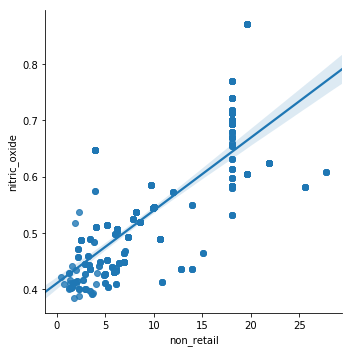

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.lmplot("non_retail", "nitric_oxide", df);

In [4]:
from scipy import stats

corr, p_value = stats.pearsonr(df["nitric_oxide"], df["non_retail"])
print(corr, p_value)

0.763651446920915 7.913361061242082e-98


Some things to note:

- The correlation is 0.76 with a low p-value, so this is likely a legitimate (positive) correlation
- But is it causation? Whether "more non-retail land causes more nitric oxide" is a valid hypothesis would of course be validated by domain experts
- There is a vertical line of values between 15 and 20: is this bad data? or is there a good reason for this pattern? Again, probably answered by domain experts!

In [5]:
df.loc[df["non_retail"].between(15, 20), "non_retail"].value_counts()

18.10    132
19.58     30
15.04      3
Name: non_retail, dtype: int64

3 - What about average number of rooms per dwelling and crime rate?

In [6]:
stats.pearsonr(df["rooms_per_dwelling"], df["crime_rate"])

(-0.19019730213043468, 1.6534898515207625e-05)

4 - What would you conclude based on these findings?

In [7]:
#

There is a low negative correlation and while the p-value is sufficiently low, the relationship doesn't make too much sense (certainly not in a causal sense) so it would be hard to be confident in concluding anything!

5 - Is there a significant difference between the crime rate near the river vs. away from it?

Split the dataset into river and non-river, and look at distributions

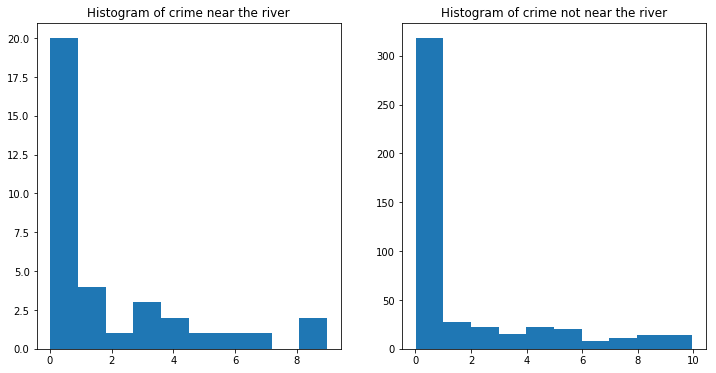

In [8]:
near_river = df.loc[df["dummy_charles_river"] == 1, "crime_rate"]
not_near_river = df.loc[df["dummy_charles_river"] == 0, "crime_rate"]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].hist(near_river)
ax[0].set_title("Histogram of crime near the river")

ax[1].hist(not_near_river)
ax[1].set_title("Histogram of crime not near the river")

plt.show()

They look similar... what if we run a t-test to verify?

In [9]:
t_statistic, p_value = stats.ttest_ind(near_river, not_near_river)

print(t_statistic, p_value)

0.3125676625894074 0.7547384335622928


The t statistic is near 0, so the effect is small, and the p-value is really high.

We therefore fail to reject the null hypothesis that there is a difference between the two groups.